C:\Users\wanje\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


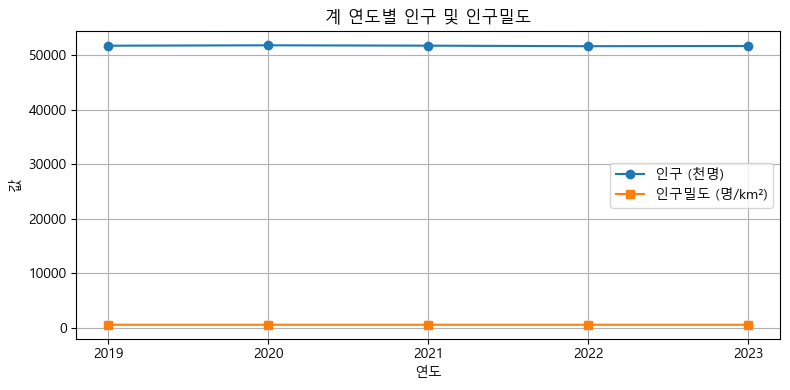

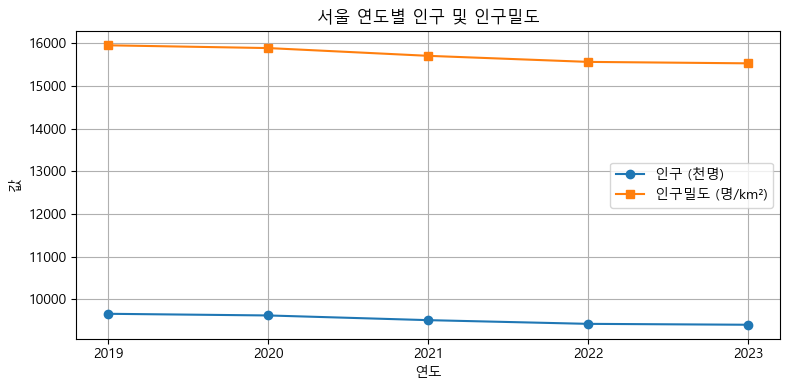

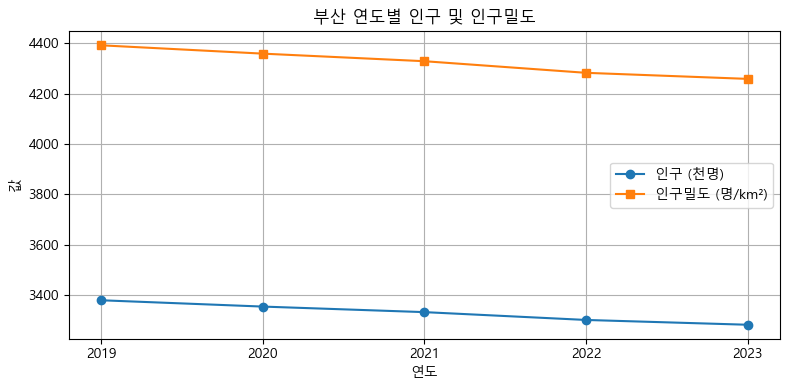

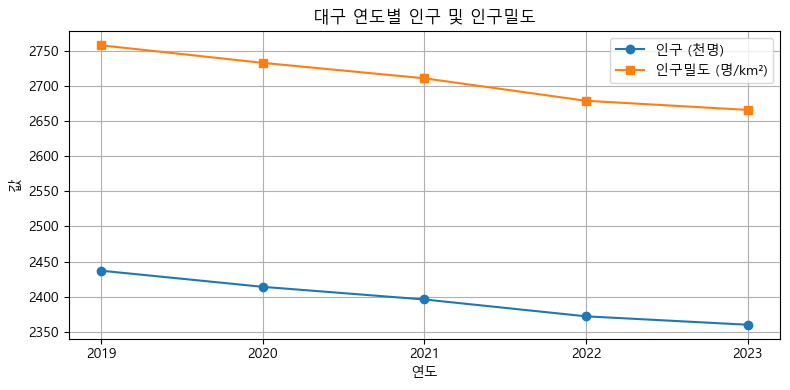

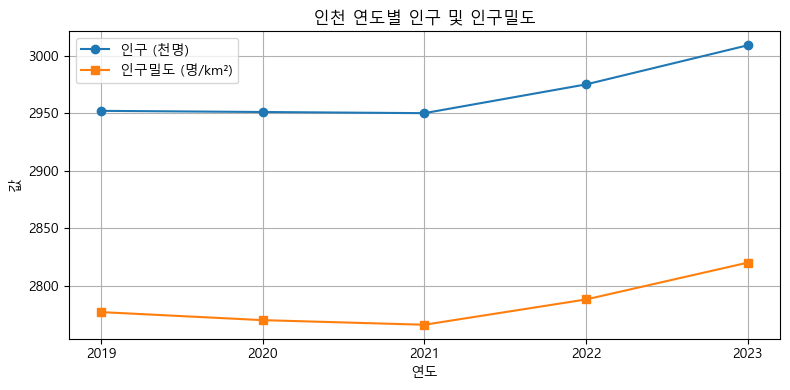

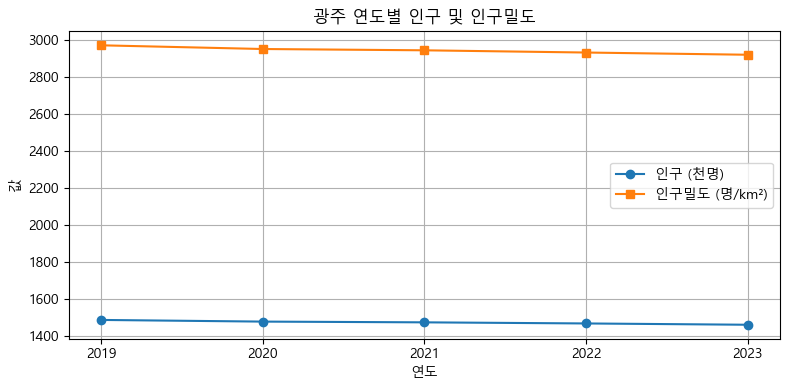

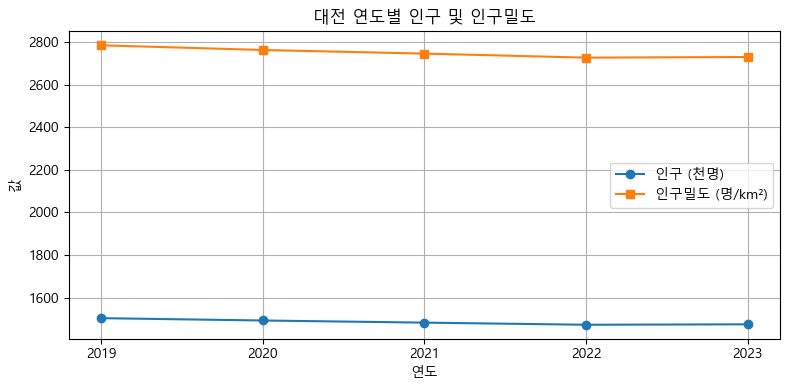

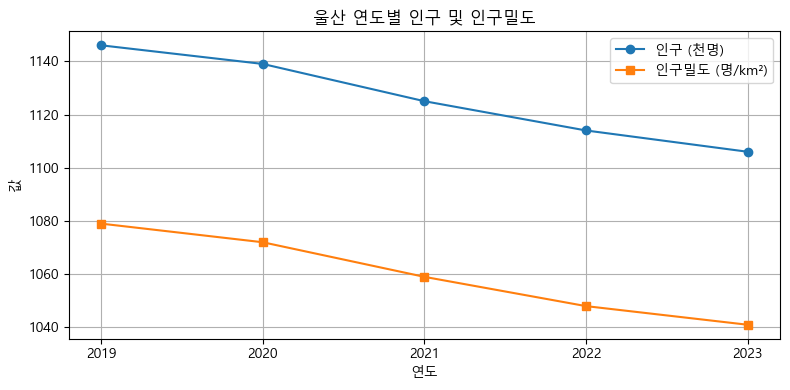

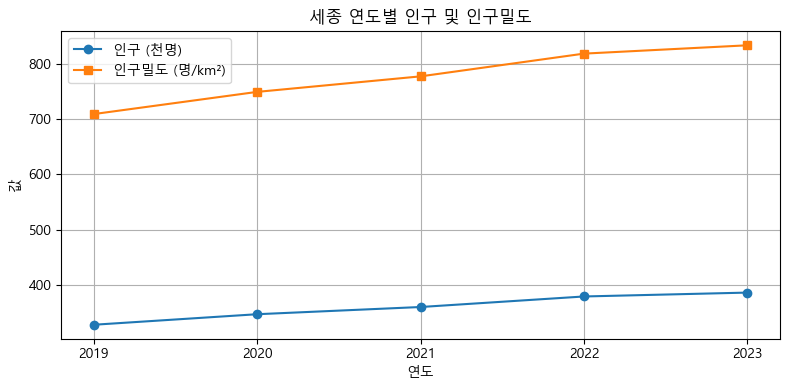

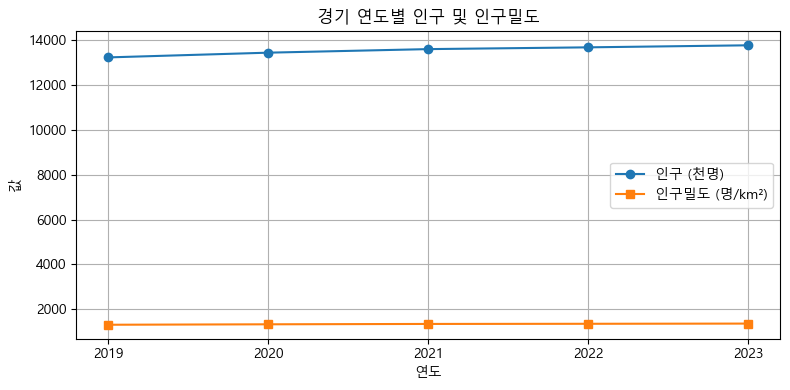

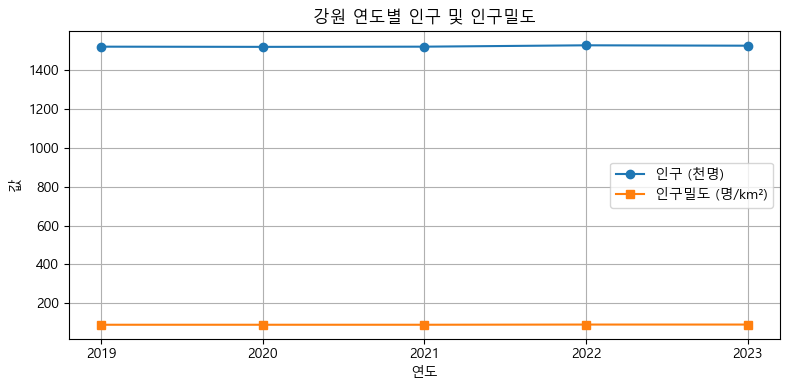

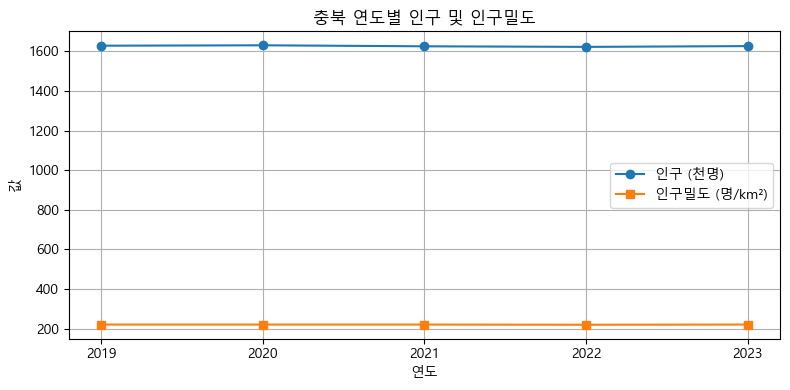

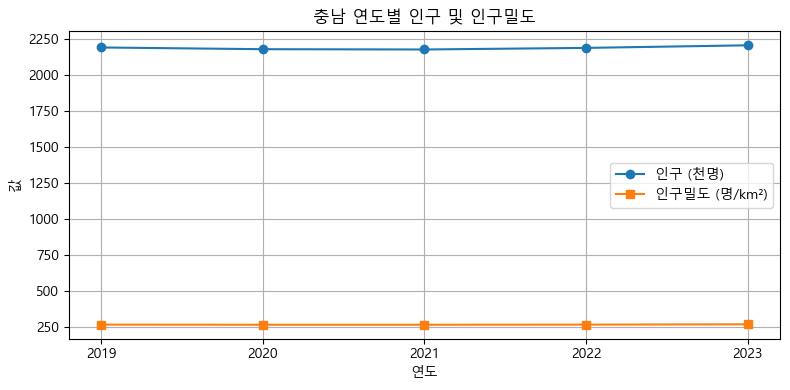

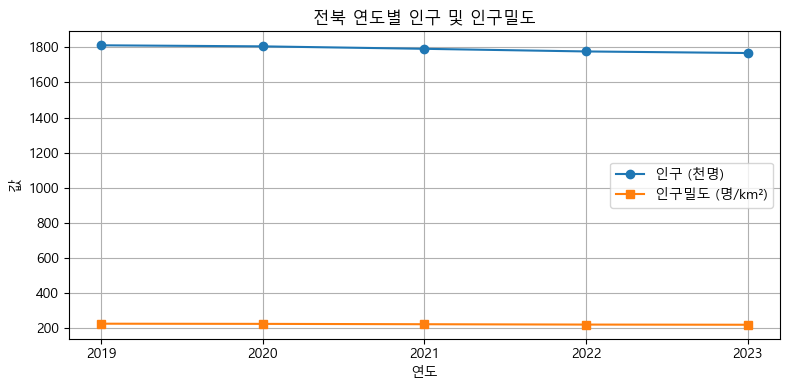

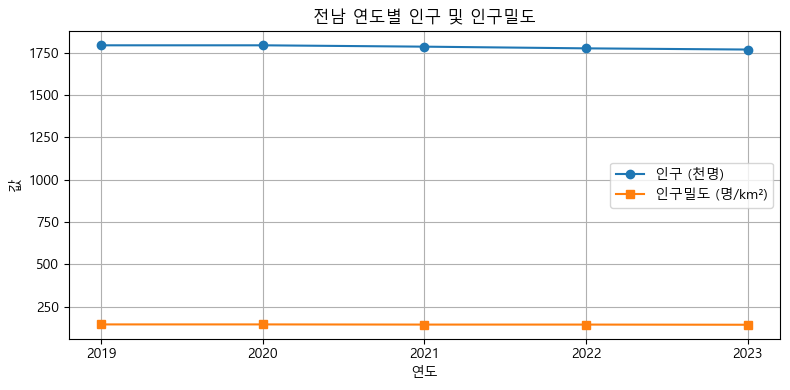

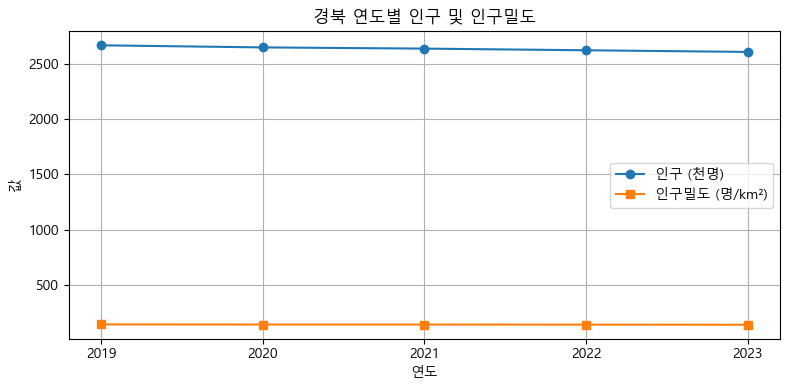

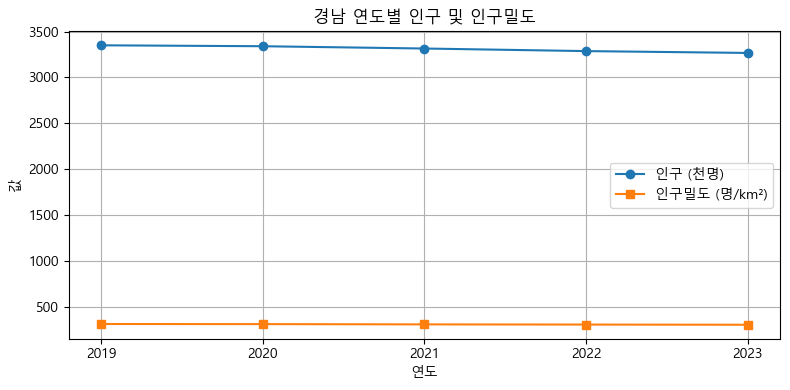

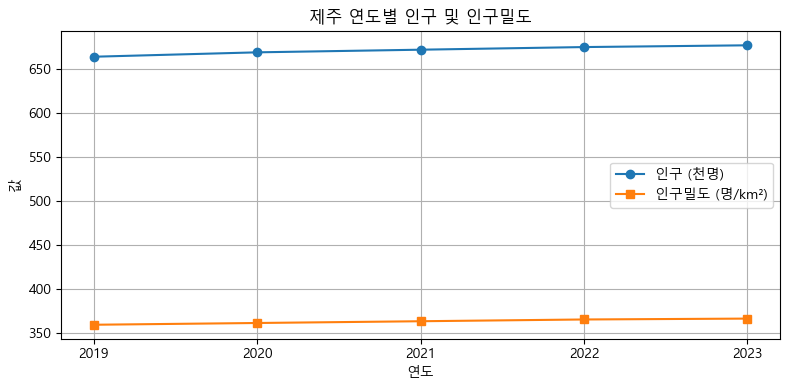

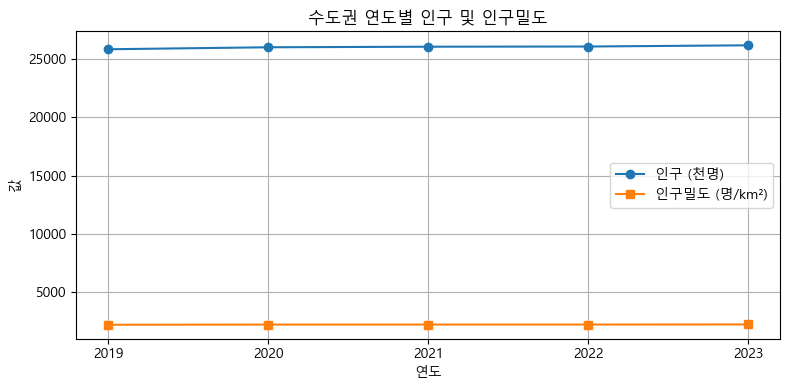

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:\\Users\\wanje\\OneDrive\\바탕 화면\\100701_20250412120042290_excel.xlsx" 
df = pd.read_excel(file_path, sheet_name='Sheet0')


data = df.iloc[3:].copy()
data.columns = ['지역', '2019_인구', '2019_밀도', '2020_인구', '2020_밀도',
                '2021_인구', '2021_밀도', '2022_인구', '2022_밀도', '2023_인구', '2023_밀도']

for col in data.columns[1:]:
    data[col] = data[col].astype(str).str.replace(',', '')
    data = data[data[col].str.replace('.', '', 1).str.isnumeric()]
    data[col] = data[col].astype(float)


regions = data['지역'].unique()

for region in regions:
    region_data = data[data['지역'] == region].T.reset_index()
    region_data.columns = ['항목', '값']
    region_data = region_data[1:]  # '지역' 행 제거

    region_data['연도'] = region_data['항목'].str.extract(r'(\d{4})')
    region_data['항목'] = region_data['항목'].str.extract(r'_(\D+)')

    pivot_df = region_data.pivot(index='연도', columns='항목', values='값')

    plt.figure(figsize=(8, 4))
    plt.plot(pivot_df.index, pivot_df['인구'], marker='o', label='인구 (천명)')
    plt.plot(pivot_df.index, pivot_df['밀도'], marker='s', label='인구밀도 (명/km²)')
    plt.title(f'{region} 연도별 인구 및 인구밀도')
    plt.xlabel('연도')
    plt.ylabel('값')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

C:\Users\wanje\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


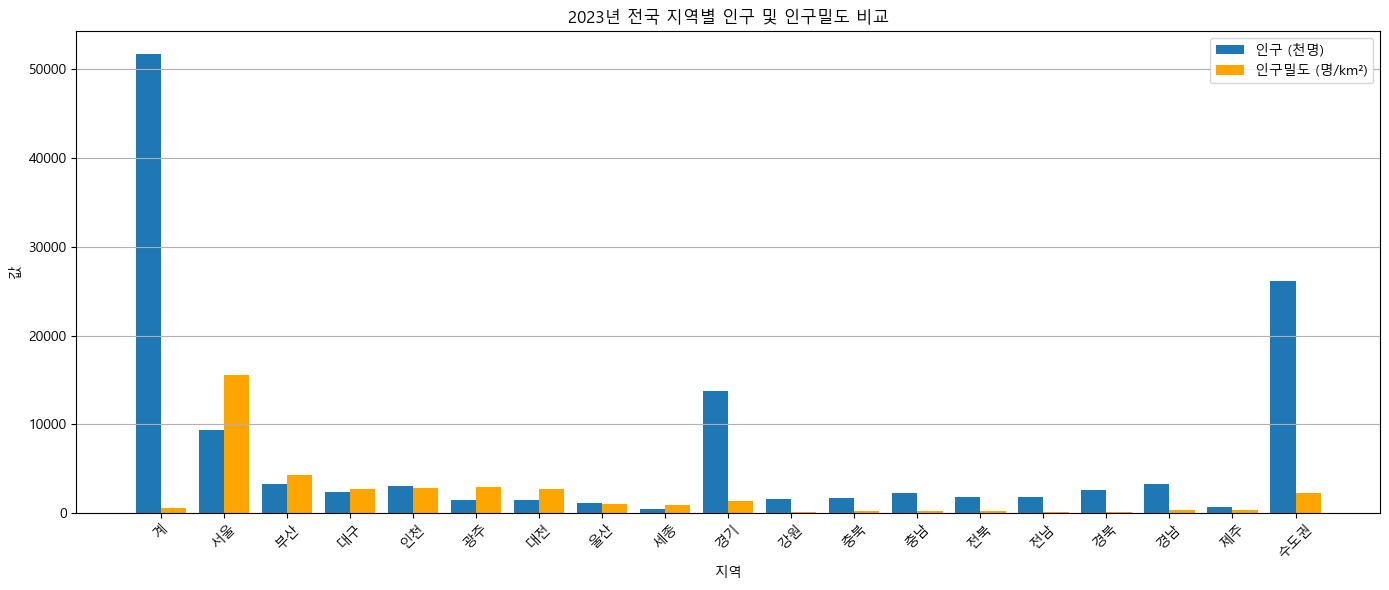

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 엑셀 파일 불러오기
file_path = "C:\\Users\\wanje\\OneDrive\\바탕 화면\\100701_20250412120042290_excel.xlsx"  # 경로에 맞게 수정
df = pd.read_excel(file_path, sheet_name='Sheet0')

# 필요한 부분 추출 및 컬럼 정리
data = df.iloc[3:].copy()
data.columns = ['지역', '2019_인구', '2019_밀도', '2020_인구', '2020_밀도',
                '2021_인구', '2021_밀도', '2022_인구', '2022_밀도', '2023_인구', '2023_밀도']

# 쉼표 제거 후 숫자 변환
for col in data.columns[1:]:
    data[col] = data[col].astype(str).str.replace(',', '')
    data = data[data[col].str.replace('.', '', 1).str.isnumeric()]
    data[col] = data[col].astype(float)

# 2023년 데이터만 추출
pop_2023 = data[['지역', '2023_인구']].copy()
dens_2023 = data[['지역', '2023_밀도']].copy()

# 인구 및 밀도 나란히 시각화
x = np.arange(len(pop_2023))  # 지역 인덱스
width = 0.4  # 막대 너비

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, pop_2023['2023_인구'], width=width, label='인구 (천명)')
plt.bar(x + width/2, dens_2023['2023_밀도'], width=width, label='인구밀도 (명/km²)', color='orange')

plt.xticks(x, pop_2023['지역'], rotation=45)
plt.xlabel('지역')
plt.ylabel('값')
plt.title('2023년 전국 지역별 인구 및 인구밀도 비교')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\wanje\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


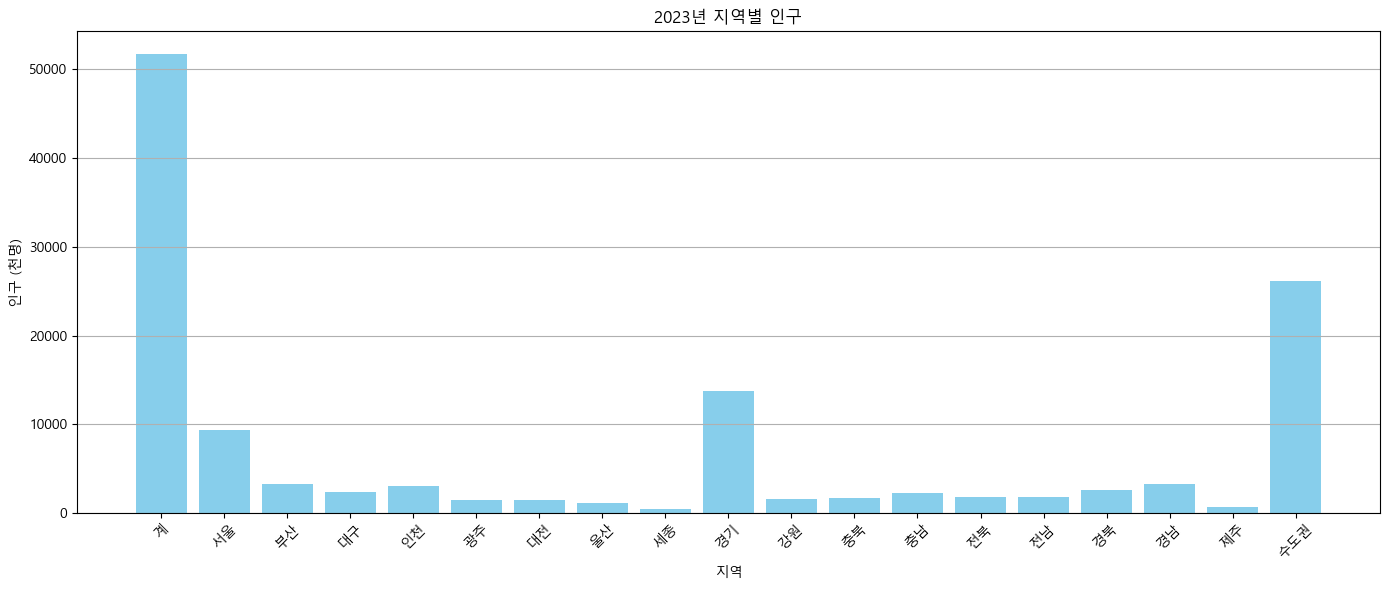

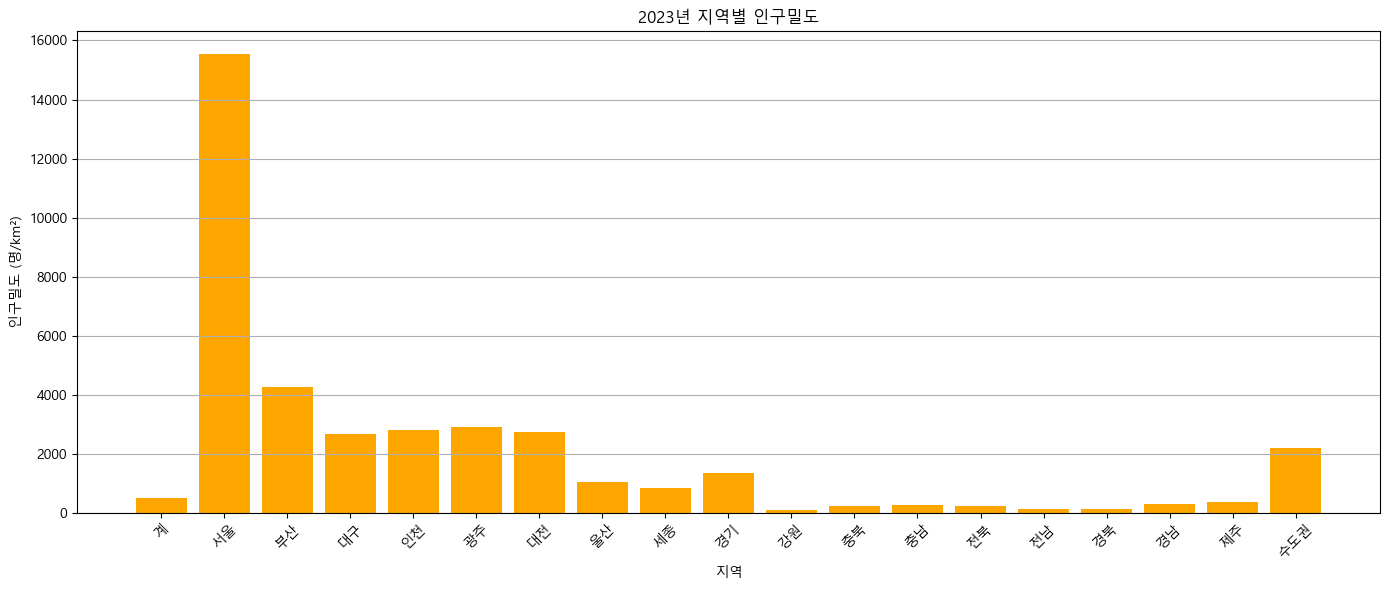

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import rc

# [1] 한글 폰트 설정 (Windows용)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우용 한글 폰트
else:
    plt.rc('font', family='AppleGothic')  # macOS의 경우

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# [2] 엑셀 파일 불러오기
file_path = "C:\\Users\\wanje\\OneDrive\\바탕 화면\\100701_20250412120042290_excel.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet0')

# [3] 데이터 전처리
data = df.iloc[3:].copy()
data.columns = ['지역', '2019_인구', '2019_밀도', '2020_인구', '2020_밀도',
                '2021_인구', '2021_밀도', '2022_인구', '2022_밀도', '2023_인구', '2023_밀도']

for col in data.columns[1:]:
    data[col] = data[col].astype(str).str.replace(',', '')
    data = data[data[col].str.replace('.', '', 1).str.isnumeric()]
    data[col] = data[col].astype(float)

# [4] 2023년 데이터 추출
pop_2023 = data[['지역', '2023_인구']].copy()
dens_2023 = data[['지역', '2023_밀도']].copy()
x = np.arange(len(pop_2023))

# [5] 인구수 그래프
plt.figure(figsize=(14, 6))
plt.bar(x, pop_2023['2023_인구'], color='skyblue')
plt.xticks(x, pop_2023['지역'], rotation=45)
plt.xlabel('지역')
plt.ylabel('인구 (천명)')
plt.title('2023년 지역별 인구')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# [6] 인구밀도 그래프
plt.figure(figsize=(14, 6))
plt.bar(x, dens_2023['2023_밀도'], color='orange')
plt.xticks(x, dens_2023['지역'], rotation=45)
plt.xlabel('지역')
plt.ylabel('인구밀도 (명/km²)')
plt.title('2023년 지역별 인구밀도')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\wanje\AppData\Local\Temp\ipykernel_7912\122069202.py:19: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wanje\AppData\Local\Temp\ipykernel_7912\122069202.py:19: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wanje\AppData\Local\Temp\ipykernel_7912\122069202.py:19: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wanje\AppData\Local\Temp\ipykernel_7912\122069202.py:19: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wanje\AppData\Local\Temp\ipykernel_7912\122069202.py:19: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wanje\AppData\Local\Temp\ipykernel_7912\122069202.py:19: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) 

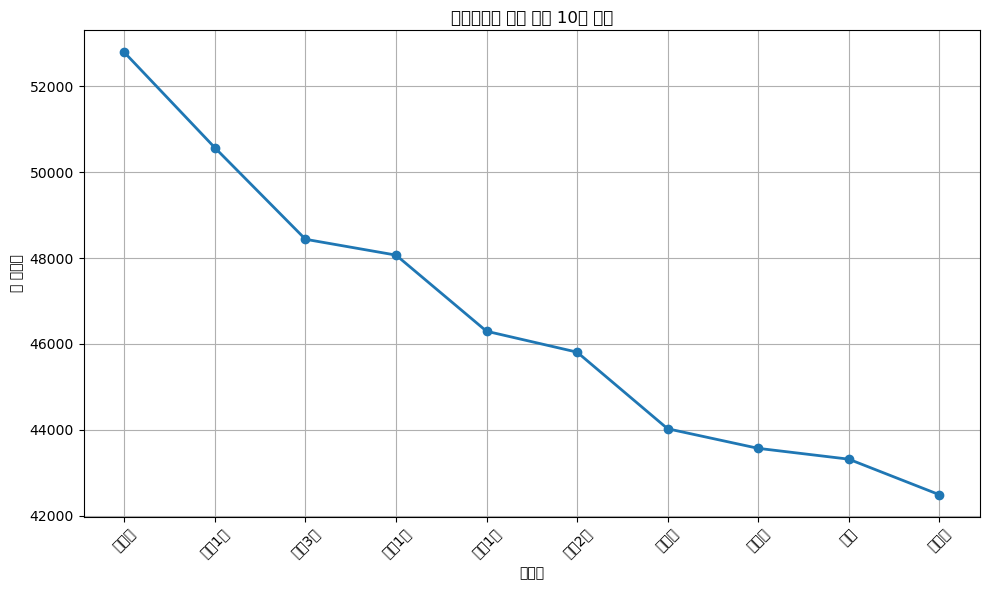

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 불러오기
file_path = "C:\\Users\\wanje\\OneDrive\\바탕 화면\\2023\\서울특별시_읍면동_2023_인구통계.xlsx"  # 같은 디렉토리에 저장되어 있어야 함
df = pd.read_excel(file_path)

# 인구 상위 10개 지역 정렬
top10 = df.sort_values(by="population", ascending=False).head(10)

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(top10["지역명"], top10["population"], marker='o', linestyle='-', linewidth=2)
plt.xlabel("지역명")
plt.ylabel("총 인구수")
plt.title("서울특별시 인구 상위 10개 지역")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'NanumGothic'

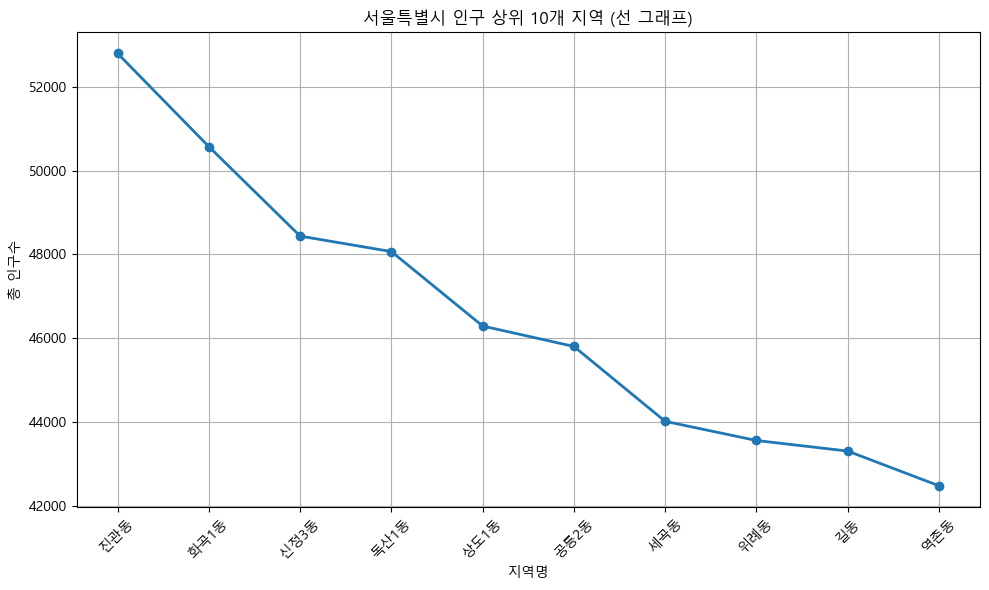

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 엑셀 파일 불러오기
file_path = "서울특별시_읍면동_2023_인구통계.xlsx"
df = pd.read_excel(file_path)

# 인구 상위 10개 지역 정렬
top10 = df.sort_values(by="population", ascending=False).head(10)

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(top10["지역명"], top10["population"], marker='o', linestyle='-', linewidth=2)
plt.xlabel("지역명")
plt.ylabel("총 인구수")
plt.title("서울특별시 인구 상위 10개 지역 (선 그래프)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


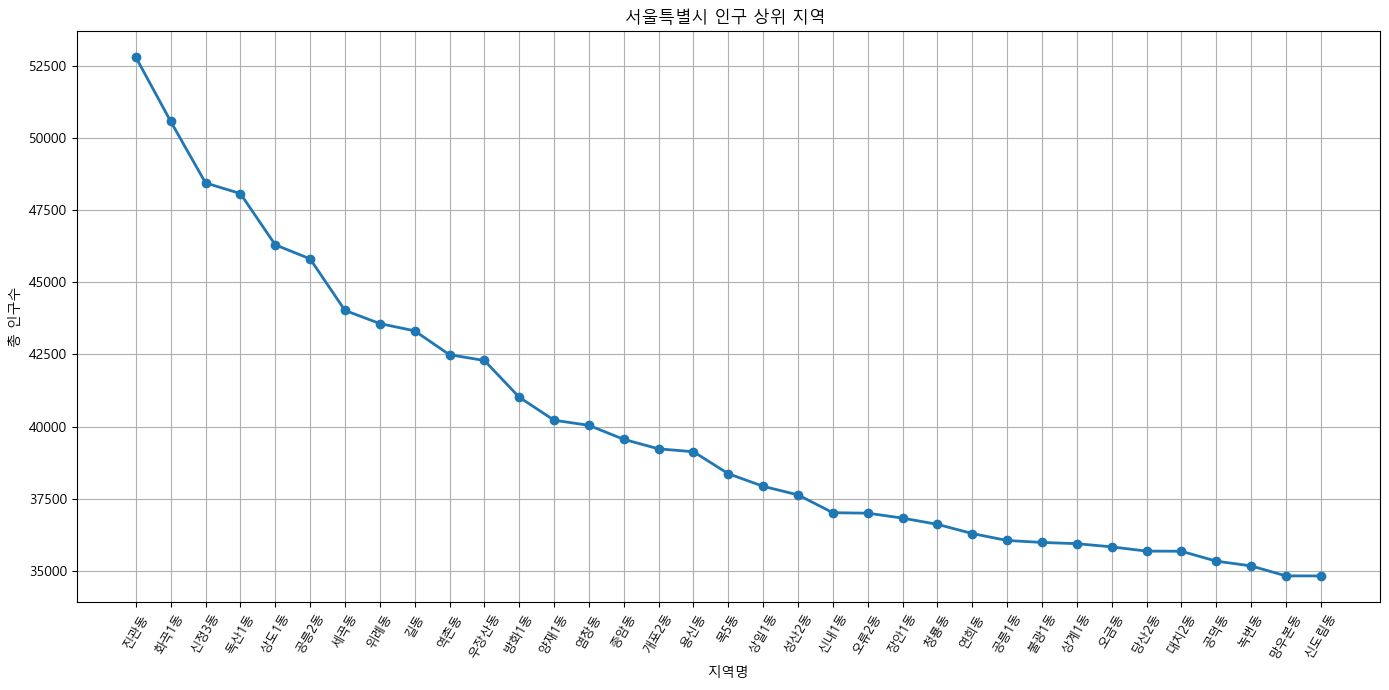

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 엑셀 파일 불러오기
file_path = "서울특별시_읍면동_2023_인구통계.xlsx"
df = pd.read_excel(file_path)

# 인구순 내림차순 정렬 후 상위 N개 선택 (여기선 35개)
topN = df.sort_values(by="population", ascending=False).head(35)

# 선 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(topN["지역명"], topN["population"], marker='o', linestyle='-', linewidth=2)
plt.xlabel("지역명")
plt.ylabel("총 인구수")
plt.title("서울특별시 인구 상위 지역 ")
plt.grid(True)
plt.xticks(rotation=60, fontsize=9)
plt.tight_layout()
plt.show()


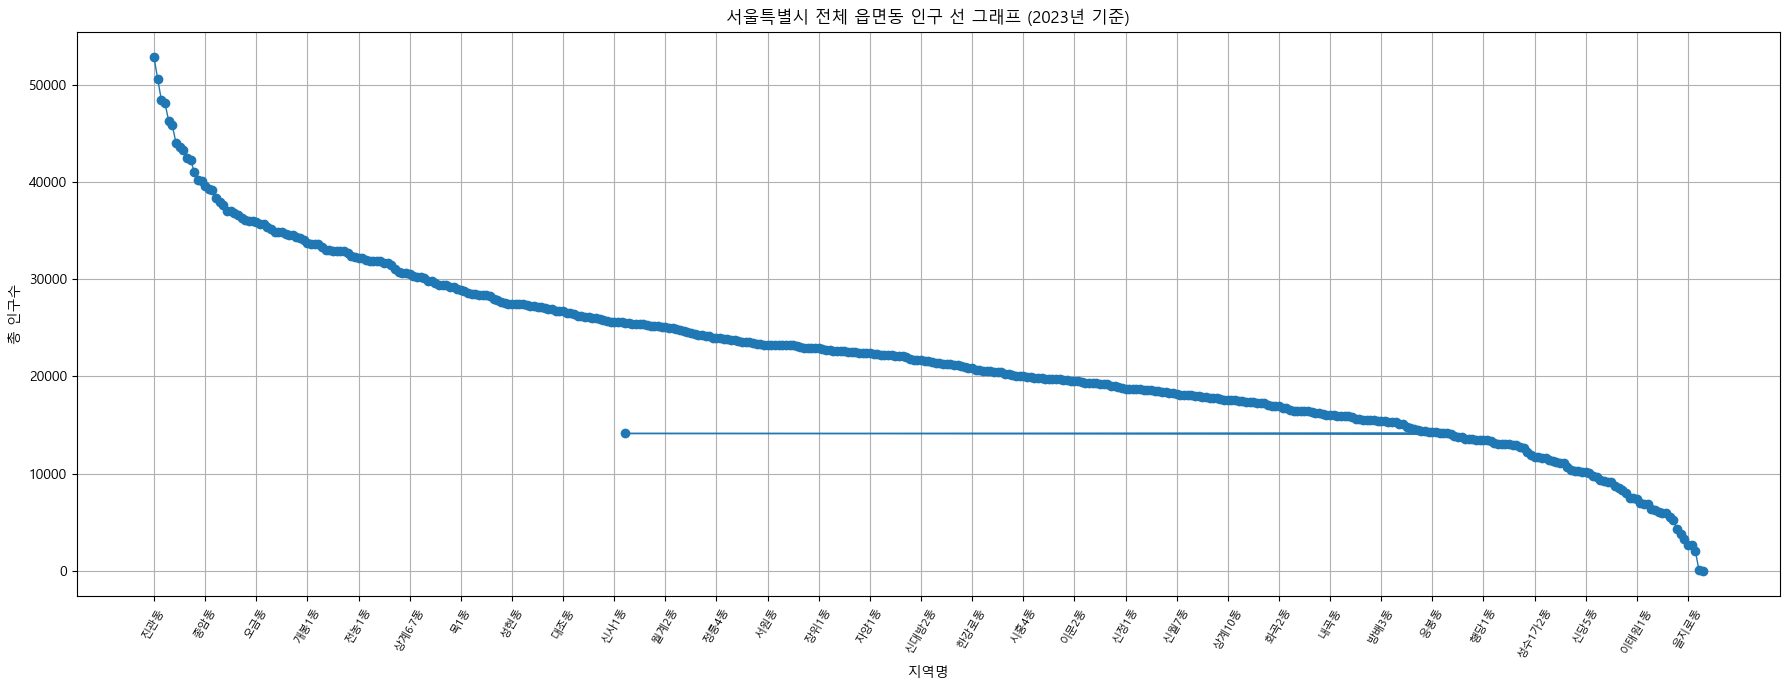

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 엑셀 파일 불러오기
file_path = "서울특별시_읍면동_2023_인구통계.xlsx"
df = pd.read_excel(file_path)

# 인구순으로 정렬 (필요 시 생략 가능)
df_sorted = df.sort_values(by="population", ascending=False).reset_index(drop=True)

# 인덱스 기준 선 그래프
plt.figure(figsize=(18, 7))
plt.plot(df_sorted["지역명"], df_sorted["population"], marker='o', linestyle='-', linewidth=1)

# x축 라벨 너무 많으니 간격 지정해서 일부만 출력
step = max(1, len(df_sorted) // 30)  # 예: 150개면 5개마다 하나 출력
plt.xticks(ticks=np.arange(0, len(df_sorted), step),
           labels=df_sorted["지역명"][::step], rotation=60, fontsize=8)

plt.xlabel("지역명")
plt.ylabel("총 인구수")
plt.title("서울특별시 전체 읍면동 인구 선 그래프 (2023년 기준)")
plt.grid(True)
plt.tight_layout()
plt.show()

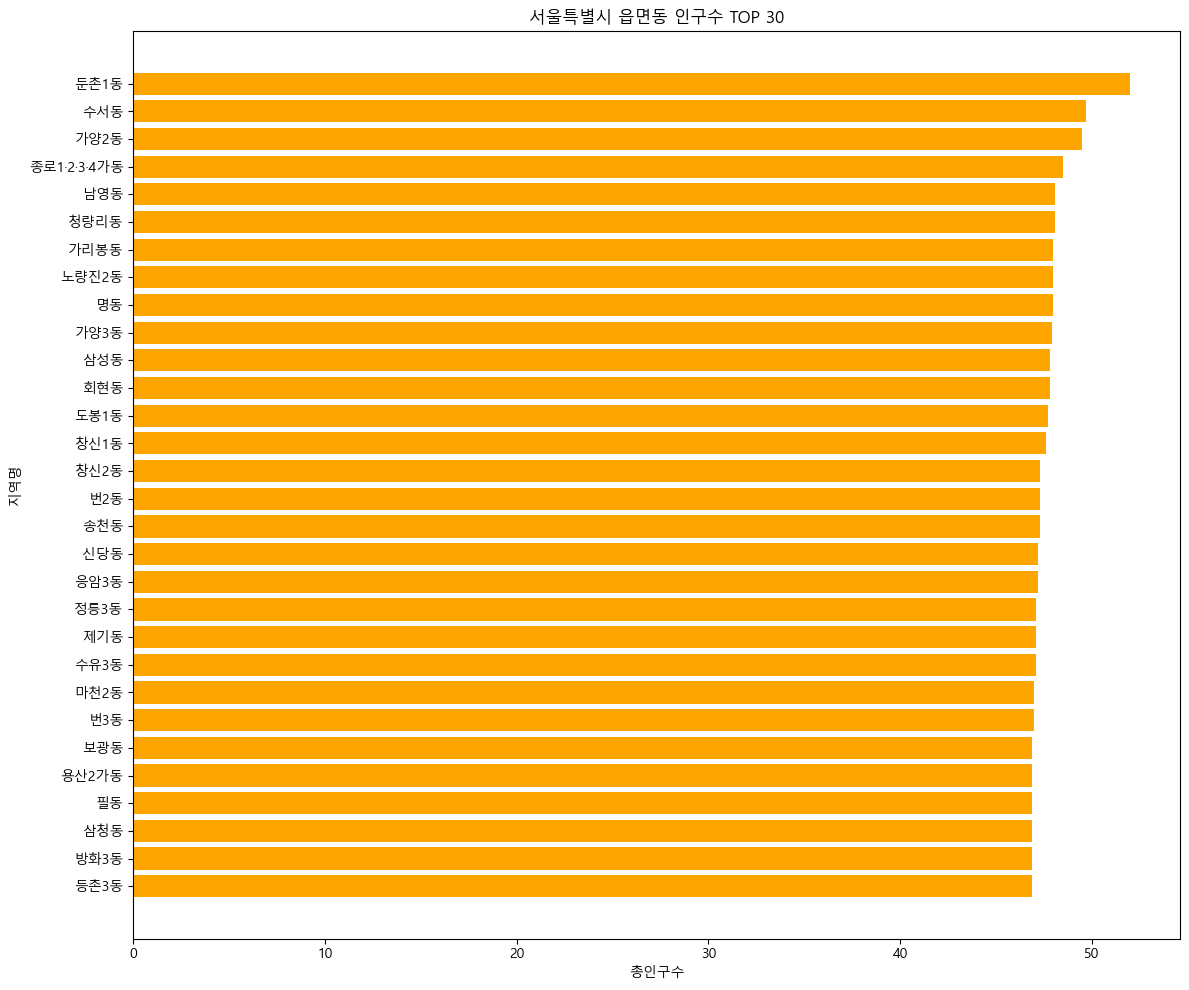

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_excel("서울특별시_읍면동_2023_인구통계.xlsx")

# 2. 열 이름 정리
df.columns = df.columns.str.strip()
df.columns = ["법정동코드", "지역명", "총인구수", "가구수"]

# 3. 숫자형 변환
df["총인구수"] = pd.to_numeric(df["총인구수"], errors="coerce")

# 4. 인구 상위 30개 지역 추출
top30 = df.sort_values(by="총인구수", ascending=False).head(30)

# 5. 시각화
plt.figure(figsize=(12, 10))
plt.barh(top30["지역명"], top30["총인구수"], color="orange")
plt.xlabel("총인구수")
plt.ylabel("지역명")
plt.title("서울특별시 읍면동 인구수 TOP 30")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


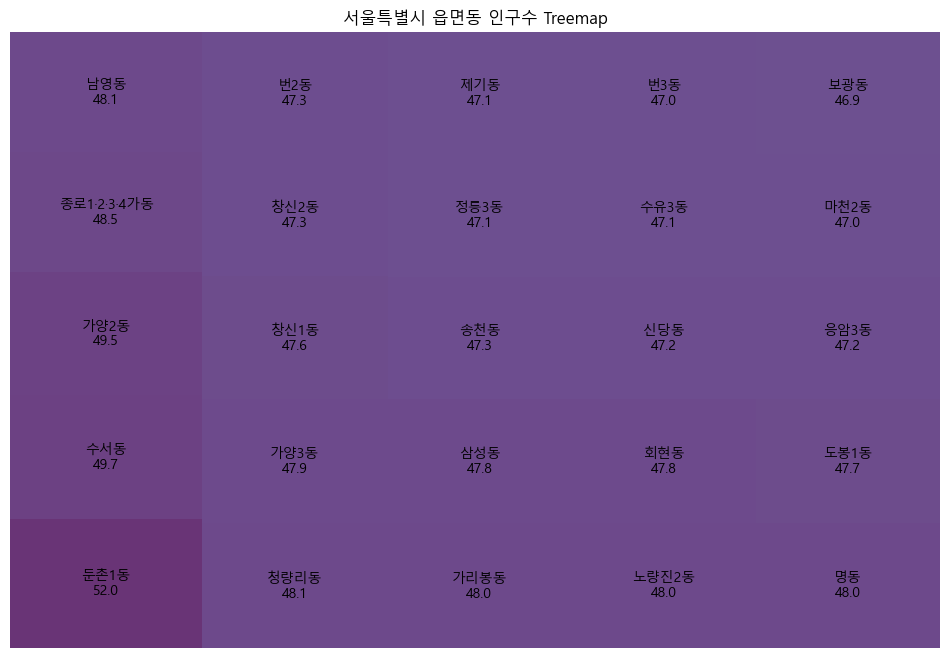

In [63]:
!pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # 트리맵용 라이브러리

# 1. 데이터 불러오기
df = pd.read_excel("서울특별시_읍면동_2023_인구통계.xlsx")
df.columns = df.columns.str.strip()
df.columns = ["법정동코드", "지역명", "총인구수", "가구수"]
df["총인구수"] = pd.to_numeric(df["총인구수"], errors="coerce")

# 2. 인구 상위 25개 동 선택
top25 = df.sort_values(by="총인구수", ascending=False).head(25)

# 3. 트리맵 시각화
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=top25["총인구수"],
    label=top25["지역명"] + "\n" + top25["총인구수"].astype(str),
    color=plt.cm.viridis_r(top25["총인구수"] / max(top25["총인구수"])),
    alpha=0.8
)
plt.title("서울특별시 읍면동 인구수 Treemap")
plt.axis("off")
plt.show()


In [65]:
import pandas as pd
import plotly.express as px

# 1. 데이터 불러오기
df = pd.read_excel("서울특별시_읍면동_2023_인구통계.xlsx")
df.columns = df.columns.str.strip()
df.columns = ["법정동코드", "지역명", "총인구수", "가구수"]

# 2. 인구수 숫자형으로 변환
df["총인구수"] = pd.to_numeric(df["총인구수"], errors="coerce")

# 3. 지역명에서 자치구 / 동 분리
df["시"] = "서울특별시"
df["자치구"] = df["지역명"].str.split().str[1]
df["읍면동"] = df["지역명"].str.split().str[2:].apply(lambda x: " ".join(x))

# 4. Sunburst용 데이터 구성
fig = px.sunburst(
    df,
    path=["시", "자치구", "읍면동"],
    values="총인구수",
    title="서울특별시 → 자치구 → 읍면동 인구 수 Sunburst Chart"
)

fig.update_traces(insidetextorientation='radial')
fig.show()


ValueError: ('None entries cannot have not-None children', 시      서울특별시
자치구      nan
읍면동         
Name: 0, dtype: object)